In [1]:
%reload_ext autoreload
%autoreload 2

import pickle

import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../matplotlibrc')

In [2]:
DATA_DIR = '../data/estimates'

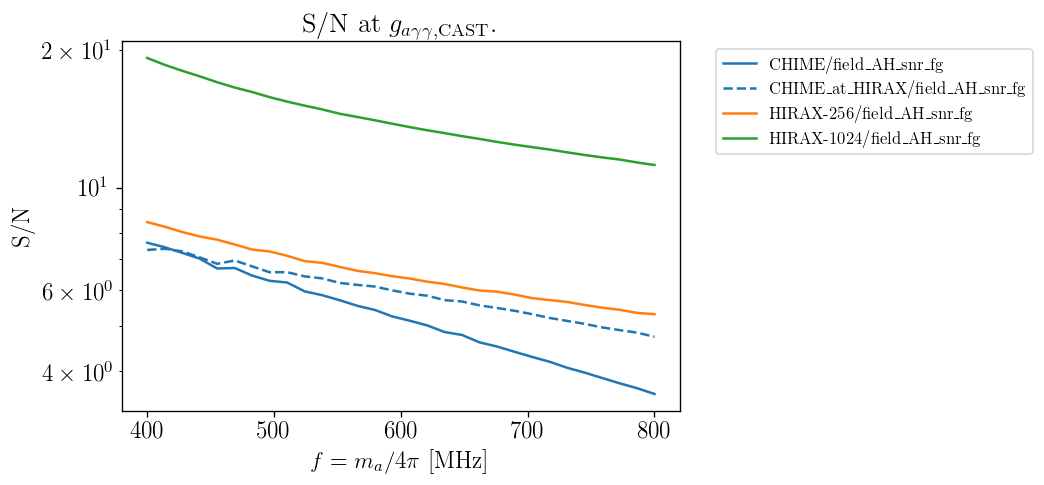

In [9]:
plot_options = {
    #'CHIME/naive_gegenschein' : dict(c='k', ls=':'),
    #'CHIME/field_AH' : dict(c='C0', ls=':'),
    #'CHIME/field_AHgamma0p8' : dict(c='C0', ls='-.'),
    #'CHIME/field_BH' : dict(c='C1', ls=':'),
    #'CHIME/field_JF' : dict(c='C2', ls=':'),
    #'CHIME/field_AH_snr' : dict(c='C0', ls='--'),
    'CHIME/field_AH_snr_fg' : dict(c='C0', ls='-'),
    'CHIME_at_HIRAX/field_AH_snr_fg' : dict(c='C0', ls='--'),
    'HIRAX-256/field_AH_snr_fg' : dict(c='C1', ls='-'),
    'HIRAX-1024/field_AH_snr_fg' : dict(c='C2', ls='-'),
}

plot_datas = {run_name : pickle.load(open(f'{DATA_DIR}/{run_name}.p', 'rb')) \
              for run_name in plot_options.keys()}

fig, ax = plt.subplots(figsize=(6, 4))

for i, (n, d) in enumerate(plot_datas.items()):
    ax.plot(d['freq'], d['SNR'], label=n, **plot_options[n])
    if n == 'field_AH_snr_comp':
        for ii in range(3):
            for jj in range(3):
                ax.plot(d['freq'], d['SNR_arr'][:,ii,0], **plot_options[n], alpha=0.2)
    
#ax.set(ylim=(0.2,10))
ax.set(xlabel=r'$f=m_a/4\pi$ [MHz]', ylabel='S/N',
       title=r'S/N at $g_{a\gamma\gamma,\mathrm{CAST}}$.')
ax.set(yscale='log')
ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1));